## Project Title : Binary Classification (Dog vs Cat)

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

In [52]:
cat = cv2.imread('train/CAT/cat.4.jpg')

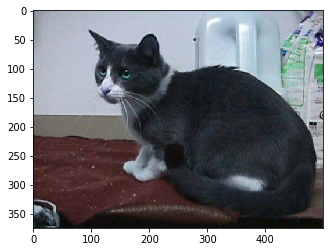

In [53]:
plt.imshow(cat)

In [4]:
cat.shape

(375, 499, 3)

In [5]:
cat = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

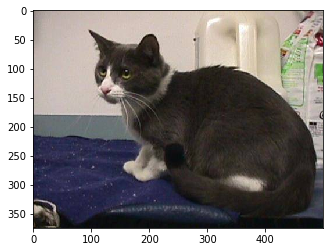

In [6]:
plt.imshow(cat)

In [7]:
dog = cv2.imread('train/DOG/dog.2.jpg')

In [8]:
dog.shape

(199, 187, 3)

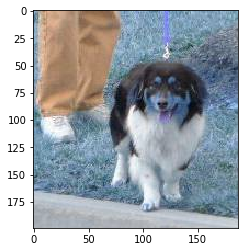

In [9]:
plt.imshow(dog)

In [10]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

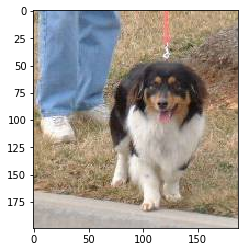

In [11]:
plt.imshow(dog)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

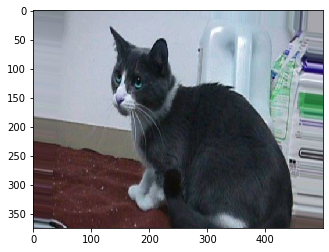

In [57]:
plt.imshow(image_gen.random_transform(cat))

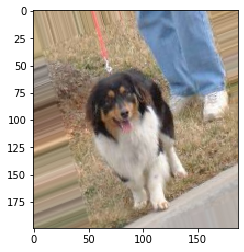

In [51]:
plt.imshow(image_gen.random_transform(dog))

In [49]:
print('Train ',image_gen.flow_from_directory('train'))

Found 18750 images belonging to 2 classes.
Train  <tensorflow.python.keras.preprocessing.image.DirectoryIterator object at 0x000001FA8D545108>


In [17]:
print('Test ',image_gen.flow_from_directory('test'))

Found 6250 images belonging to 2 classes.
Test  <tensorflow.python.keras.preprocessing.image.DirectoryIterator object at 0x000001FA8AD741C8>


In [18]:
input_shape = (150,150,3)

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [25]:
input_size=input_shape[:2]

In [26]:
batch_size=64

In [27]:
train_gen = image_gen.flow_from_directory('train',
                                          target_size=input_size,
                                          batch_size=batch_size,
                                          class_mode='binary')

Found 18750 images belonging to 2 classes.


In [28]:
test_gen = image_gen.flow_from_directory('test',
                                          target_size=input_size,
                                          batch_size=batch_size,
                                          class_mode='binary')

Found 6250 images belonging to 2 classes.


In [29]:
train_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [30]:
results=model.fit_generator(train_gen,epochs=20,steps_per_epoch=100,validation_data=test_gen,validation_steps=12)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 375s 4s/step - loss: 0.6969 - accuracy: 0.5288 - val_loss: 0.6694 - val_accuracy: 0.5768
Epoch 2/20
100/100 [==============================] - 505s 5s/step - loss: 0.6707 - accuracy: 0.5855 - val_loss: 0.6433 - val_accuracy: 0.5964
Epoch 3/20
100/100 [==============================] - 472s 5s/step - loss: 0.6408 - accuracy: 0.6283 - val_loss: 0.6291 - val_accuracy: 0.6263
Epoch 4/20
100/100 [==============================] - 442s 4s/step - loss: 0.6264 - accuracy: 0.6467 - val_loss: 0.6006 - val_accuracy: 0.6888
Epoch 5/20
100/100 [==============================] - 417s 4s/step - loss: 0.5964 - accuracy: 0.6822 - val_loss: 0.5716 - val_accuracy: 0.7070
Epoch 6/20
100/100 [==============================] - 337s 3s/step - loss: 0.5891 - accuracy: 0.6809 - val_loss: 0.5678 - val_accuracy: 0.7487
Epoch 7/20
100/100 [==============================] - 298s 3s/step

In [31]:
type(results)

tensorflow.python.keras.callbacks.History

In [32]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [33]:
print('Loss         : ',results.history['loss'])
print('Accuracy     : ',results.history['accuracy'])
print('Val_loss     : ',results.history['val_loss'])
print('Val_Accuracy : ',results.history['val_accuracy'])

Loss         :  [0.6968628764152527, 0.6706597208976746, 0.6408234238624573, 0.6264294385910034, 0.5964387655258179, 0.5890935659408569, 0.5688977837562561, 0.5570420026779175, 0.5462125539779663, 0.5374330282211304, 0.5237025618553162, 0.5207811594009399, 0.5096608996391296, 0.5024570822715759, 0.48569121956825256, 0.4946637749671936, 0.4701366424560547, 0.4585341513156891, 0.46367767453193665, 0.46967393159866333]
Accuracy     :  [0.5287500023841858, 0.5854687690734863, 0.6282812356948853, 0.6467187404632568, 0.6821874976158142, 0.6809375286102295, 0.705532968044281, 0.7142187356948853, 0.7279687523841858, 0.7319474816322327, 0.7366364598274231, 0.7431250214576721, 0.7541419267654419, 0.7560937404632568, 0.7670312523841858, 0.76171875, 0.7826562523841858, 0.7918750047683716, 0.78515625, 0.7734375]
Val_loss     :  [0.6693525910377502, 0.6432884335517883, 0.6291268467903137, 0.6005507111549377, 0.5715515613555908, 0.5677537322044373, 0.5246468782424927, 0.5519647002220154, 0.4875788688

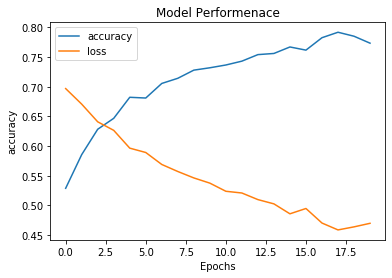

In [34]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['loss'])
plt.title('Model Performenace')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['accuracy','loss'],loc='upper left')
plt.show()

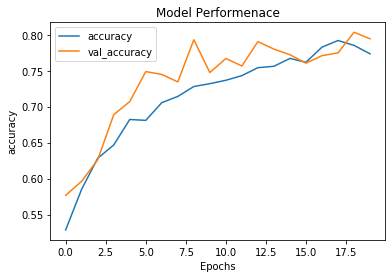

In [35]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Performenace')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['accuracy','val_accuracy'],loc='upper left')
plt.show()

In [36]:
from tensorflow.keras.preprocessing import image

In [37]:
import numpy as np

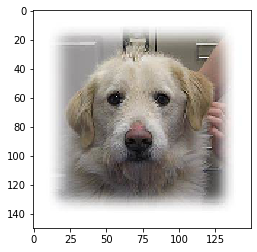

In [58]:
ver_img = image.load_img('ver_test/3.jpg',target_size=input_size)
plt.imshow(ver_img)

In [59]:
ver_img = image.img_to_array(ver_img)
print(ver_img.shape)

ver_img = np.expand_dims(ver_img,axis=0)
print(ver_img.shape)
ver_img=ver_img/255 

(150, 150, 3)
(1, 150, 150, 3)


In [60]:
prediction=model.predict(ver_img)

In [61]:
print(f'Probabiloty of that image to a dog or cat is:{prediction}')

Probabiloty of that image to a dog or cat is:[[0.6255785]]


In [62]:
result = model.predict_classes(ver_img)
result

array([[1]])

In [63]:
if result==0:
    print('cat')
elif result==1:
    print('Dog')
else:
    print('null')

Dog


In [ ]:
model.save('cats_and_dogs.h5')